# Correlation coeffs
This notebooks outputs the following figures:
- SF8: Bootstrap correlation statistics for APcomp SS versus Drake Passage SS records

In [1]:
cd '/Users/starr/My Drive/Files/Projects/U1475/subproject_repos/SS_Paper/Starr_etal_ACC'

/Users/starr/My Drive/Files/Projects/U1475/subproject_repos/SS_Paper/Starr_etal_ACC


In [2]:
# preamble
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
sns.set_theme(style="ticks")

from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from scipy import signal,stats
from scipy.interpolate import interp1d

### DONT DO THIS
import warnings
warnings.filterwarnings("ignore")
####

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['font.size'] = 10
mpl.rcParams["mathtext.fontset"] = "dejavusans"

plt.style.use('default')

mis_bounds = pd.read_csv('data/misc/LR04_MISboundaries.txt')
# remove sub-stages from table\n",
mis_bounds.drop([4,5,6,7,8],inplace=True)
mis_bounds.iloc[-1] = {'MIS':'0/1','Age(ka)':0}
mis_bounds.sort_values('Age(ka)',inplace=True)
mis_bounds.reset_index(drop=True,inplace=True)

### define age_model function
def age_model(depth_in,ties):
    f = interp1d(ties.iloc[:,0],ties.iloc[:,1],fill_value='extrapolate')
    age = f(depth_in)
    return age

In [3]:
### Load Data
##### APcomp
apcomp = pd.read_csv('tables/ap_comp_ss.csv')

##ps97/093
ps97_xrf = pd.read_excel('data/external_data.xlsx',sheet_name='PS97_097_xrf',header=12)
ps97_ss = pd.read_csv('tables/ps97_ss.csv')
ps97_085 = pd.read_csv('tables/ps97_085_ss.csv')

## u1540 and u1541
u1540 = pd.read_csv('tables/u1540_ss.csv')
u1541 = pd.read_csv('tables/u1541_ss.csv')

## APcomp vs PS97/085 (0 - 150 kyr) and APcomp vs PS97/097 (0 – 1.3 Ma)

In [4]:
#### linear interpolation
t = np.arange(1,142,0.5)
df = pd.DataFrame()
df['t'] = t
## APcomp
x = apcomp['LR04_age']
y = apcomp['SS_dHolocene']
df['apcomp_y'] = interp1d(x,y,fill_value='extrapolate')(t)

## PS97/085
x = ps97_085['Age [ka BP]']
y = ps97_085['SSFS_dHolocene']
df['ps085_y'] = interp1d(x,y,fill_value='extrapolate')(t)
df = df.dropna()


#### linear interpolation 2
t2 = np.arange(1,1360,1.5)
df2 = pd.DataFrame()
df2['t'] = t2
## APcomp
x = apcomp['LR04_age']
y = apcomp['SS_dHolocene']
df2['apcomp_y'] = interp1d(x,y,fill_value='extrapolate')(t2)

## PS97/085
x = ps97_ss['Revised Age (Starr)']
y = ps97_ss['SS_dHolocene']
df2['ps097_y'] = interp1d(x,y,fill_value='extrapolate')(t2)
df2 = df2.dropna()

#### linear interpolation 3
t3 = np.arange(1,1800,1.5)
df3 = pd.DataFrame()
df3['t'] = t3
## APcomp
x = apcomp['LR04_age']
y = apcomp['SS_dHolocene']
df3['apcomp_y'] = interp1d(x,y,fill_value='extrapolate')(t3)

## U1540/U1541
x = u1540['Age [ka BP]']
y = u1540['SS_dHolocene']
df3['u1540_y'] = interp1d(x,y,fill_value='extrapolate')(t3)

x = u1541['Age [ka BP]']
y = u1541['SS_dHolocene']
df3['u1541_y'] = interp1d(x,y,fill_value='extrapolate')(t3)
df3 = df3.dropna()


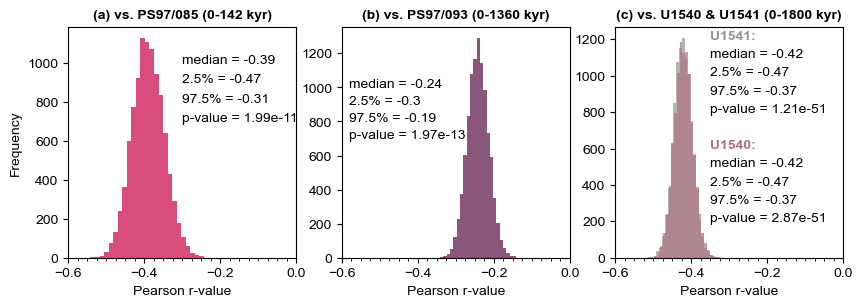

In [14]:
#### bootstrap correlation
from scipy.stats import bootstrap
from scipy.stats import pearsonr

rng = np.random.default_rng()

def replicate(data1,data2,sims=100000,stat=np.corrcoef):
    rep=np.empty(sims)
    for i in range(sims):
        inds=np.random.choice(a=data1.index,size=len(data1),replace=True)
        rep[i]=stat(data1.loc[inds],data2.loc[inds])[0,1]
    return(rep)

corr =replicate(df['apcomp_y'],df['ps085_y'],sims=10000,stat=np.corrcoef)
corr2 =replicate(df2['apcomp_y'],df2['ps097_y'],sims=10000,stat=np.corrcoef)
corr3 =replicate(df3['apcomp_y'],df3['u1541_y'],sims=10000,stat=np.corrcoef)
corr4 =replicate(df3['apcomp_y'],df3['u1540_y'],sims=10000,stat=np.corrcoef)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['font.size'] = 10

fig, ax = plt.subplots(1,3,figsize=(10,3))
ax[0].hist(corr, bins=25,alpha=0.7,fc='xkcd:ruby')
# ax[0].axvline(np.percentile(corr,[2.5]).round(3),c='k',linestyle='--',alpha=0.5)
# ax[0].axvline(np.percentile(corr,[97.5]).round(3),c='k',linestyle='--',alpha=0.5)
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Pearson r-value')
ax[2].set_xlabel('Pearson r-value')


ax[1].hist(corr2, bins=25,alpha=0.7,fc='xkcd:plum')

ax[2].hist(corr3, bins=25,alpha=0.7,fc='xkcd:grey')
ax[2].hist(corr4, bins=25,alpha=0.7,fc='xkcd:mauve')

# ax[1].axvline(np.percentile(corr2,[2.5]).round(3),c='k',linestyle='--',alpha=0.5)
# ax[1].axvline(np.percentile(corr2,[97.5]).round(3),c='k',linestyle='--',alpha=0.5)
ax[1].set_xlabel('Pearson r-value')
ax[0].set_title('(a) vs. PS97/085 (0-142 kyr)',fontsize=10,fontweight='bold')
ax[1].set_title('(b) vs. PS97/093 (0-1360 kyr)',fontsize=10,fontweight='bold')
ax[2].set_title('(c) vs. U1540 & U1541 (0-1800 kyr)',fontsize=10,fontweight='bold')

ax[0].text(-0.3,1000,'median = '+str(np.round(np.median(corr),2)))
ax[0].text(-0.3,900,'2.5% = '+str(np.round(np.percentile(corr,2.5),2)))
ax[0].text(-0.3,800,'97.5% = '+str(np.round(np.percentile(corr,97.5),2)))
f = '{:.2e}'.format(float(pearsonr(df['apcomp_y'],df['ps085_y'])[1]))
ax[0].text(-0.3,700,'p-value = '+f)

ax[1].text(-0.58,1000,'median = '+str(np.round(np.median(corr2),2)))
ax[1].text(-0.58,900,'2.5% = '+str(np.round(np.percentile(corr2,2.5),2)))
ax[1].text(-0.58,800,'97.5% = '+str(np.round(np.percentile(corr2,97.5),2)))
f = '{:.2e}'.format(float(pearsonr(df2['apcomp_y'],df2['ps097_y'])[1]))
ax[1].text(-0.58,700,'p-value = '+f)

ax[2].text(-0.35,1200,'U1541:',fontweight='bold',color='xkcd:grey')
ax[2].text(-0.35,1100,'median = '+str(np.round(np.median(corr3),2)))
ax[2].text(-0.35,1000,'2.5% = '+str(np.round(np.percentile(corr3,2.5),2)))
ax[2].text(-0.35,900,'97.5% = '+str(np.round(np.percentile(corr3,97.5),2)))
f = '{:.2e}'.format(float(pearsonr(df3['apcomp_y'],df3['u1541_y'])[1]))
ax[2].text(-0.35,800,'p-value = '+f)


ax[2].text(-0.35,600,'U1540:',fontweight='bold',color='xkcd:mauve')
ax[2].text(-0.35,500,'median = '+str(np.round(np.median(corr4),2)))
ax[2].text(-0.35,400,'2.5% = '+str(np.round(np.percentile(corr4,2.5),2)))
ax[2].text(-0.35,300,'97.5% = '+str(np.round(np.percentile(corr4,97.5),2)))
f = '{:.2e}'.format(float(pearsonr(df3['apcomp_y'],df3['u1540_y'])[1]))
ax[2].text(-0.35,200,'p-value = '+f)



ax[0].xaxis.set_minor_locator(MultipleLocator(0.025))
ax[1].xaxis.set_minor_locator(MultipleLocator(0.025))
ax[2].xaxis.set_minor_locator(MultipleLocator(0.025))


ax[0].set_xlim(-0.6,0)
ax[1].set_xlim(-0.6,0)
ax[2].set_xlim(-0.6,0)

plt.savefig('SF10_DF_corrcoef.pdf',bbox_inches='tight')

In [21]:
f = '{:.2e}'.format(float(pearsonr(df['apcomp_y'],df['ps085_y'])[1]))

In [22]:

f

'1.99e-11'

In [7]:
from scipy.stats.stats import pearsonr
print('p-value versus PS85 ' + str()
print('p-value versus PS97 ' + str(pearsonr(df2['apcomp_y'],df2['ps097_y'])))


p-value versus PS85 (-0.39006584709026854, 1.9924066156469742e-11)
p-value versus PS97 (-0.2418573758314568, 1.967251134678291e-13)
